In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("performance.csv")
df

,Category,Value,Count,Whisper F1,Whisper err,Human Expert F1,Human err
0,Spoken Task,Vowel,38,46.5%,18.82%,54.0%,7.6%
1,Spoken Task,Repeat,42,66.5%,8.00%,59.8%,6.4%
2,Spoken Task,Recall,80,65.4%,0.87%,60.8%,4.6%
3,Spoken Task,Picture,78,72.3%,4.53%,65.8%,5.0%
4,Spoken Task,Read,72,80.2%,3.04%,80.7%,2.8%
5,Severity,Mild,48,37.6%,5.60%,29.3%,6.6%
6,Severity,Moderate,80,91.6%,1.68%,88.9%,2.5%
7,Severity,Severe,19,74.7%,14.07%,75.7%,11.2%
8,Age Group,53-62,44,57.2%,6.74%,49.3%,7.0%
9,Age Group,63-72,54,77.7%,6.67%,73.9%,8.6%


In [3]:
# Convert percentage strings to floats
df["Whisper F1"] = df["Whisper F1"].str.rstrip("%").astype(float)
df["Human Expert F1"] = df["Human Expert F1"].str.rstrip("%").astype(float)
df["Whisper err"] = df["Whisper err"].str.rstrip("%").astype(float)
df["Human err"] = df["Human err"].str.rstrip("%").astype(float)

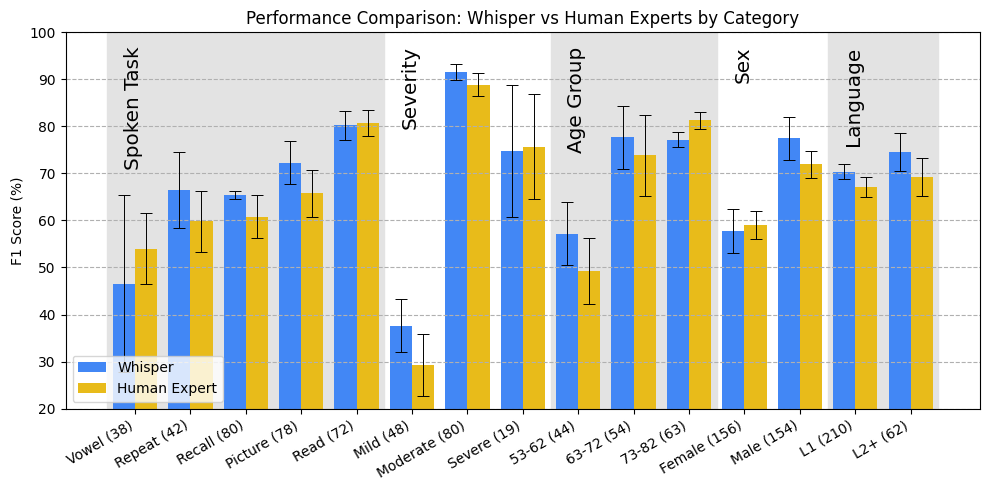

In [4]:
# Use the original dataframe order instead of sorting
categories = df["Value"] + " (" + df["Count"].astype(str) + ")"
x = np.arange(len(categories))

width = 0.4

fig, ax = plt.subplots(figsize=(10,5))


# Add alternating background shading for categories
unique_cats = df["Category"].unique()
current_x = 0
active = True
for cat in unique_cats:
    n_items = (df["Category"] == cat).sum()
    
    ax.text(s=cat, x=current_x - 0.2, y=97, rotation="vertical", va="top", fontsize="x-large")
    if active:
        ax.axvspan(current_x - 0.5, current_x + n_items - 0.5, color="#e3e3e3")
    current_x += n_items
    active = not active

# Plot bars with error bars
minimum = 20
bars1 = ax.bar(x - width/2, df["Whisper F1"], width, error_kw=dict(lw=0.7, capthick=0.7),
               yerr=df["Whisper err"], capsize=4, label="Whisper", color="#4287f5")
bars2 = ax.bar(x + width/2, df["Human Expert F1"], width, error_kw=dict(lw=0.7, capthick=0.7),
               yerr=df["Human err"], capsize=4, label="Human Expert", color="#e8bb1a")


# Formatting
ax.set_ylabel("F1 Score (%)")
ax.set_title("Performance Comparison: Whisper vs Human Experts by Category")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=30, ha="right")
ax.set_ylim(20, 100)
ax.legend(loc="lower left")

# Group label

# Gridlines
ax.yaxis.grid(True, linestyle="--")

plt.tight_layout()
plt.savefig("performance_comparison.pdf")

plt.show()


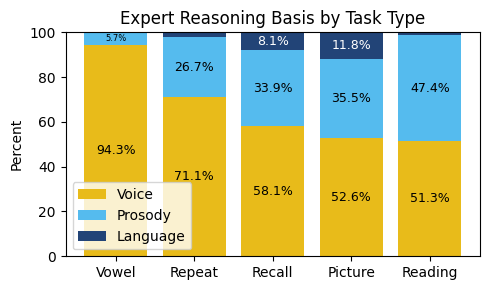

In [6]:
import matplotlib.pyplot as plt
import numpy as np

tasks = ["Vowel", "Repeat", "Recall", "Picture", "Reading"]

voice = np.array([94.34, 71.11, 58.06, 52.63, 51.28])
prosody = np.array([5.66, 26.67, 33.87, 35.53, 47.44])
language = np.array([0.00, 2.22, 8.06, 11.84, 1.28])

# Stacked bar chart
fig, ax = plt.subplots(figsize=(5, 3))

bars_voice = ax.bar(tasks, voice, label="Voice", color="#e8bb1a")
bars_prosody = ax.bar(tasks, prosody, bottom=voice, label="Prosody", color="#55bbee")
bars_language = ax.bar(tasks, language, bottom=voice + prosody, label="Language", color="#224477")

# Function to label each bar segment
def label_bars(bars, color="black"):
    for bar in bars:
        height = bar.get_height()
        if height > 6:  # skip short segments
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha="center", va="center", fontsize=9, color=color
            )
        elif height > 3:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha="center", va="center", fontsize=6, color=color
            )
label_bars(bars_voice)
label_bars(bars_prosody)
label_bars(bars_language, color="white")

ax.set_ylabel("Percent")
#ax.set_xlabel("Spoken task")
ax.set_title("Expert Reasoning Basis by Task Type")
ax.legend(loc="lower left")

plt.tight_layout()
plt.savefig("expert_reason.pdf")
plt.show()